In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [2]:
# Import get_engine function from sql_functions.py and set it to a variable called engine
from sql_functions import get_engine 
engine = get_engine()
# Import psycopg2
import psycopg2

In [3]:
# Import the Information about the schema & table name
schema = 'capstone_wildfire' 
table_name = 'combined_weather_data_v4'

In [4]:
# Get Data From SQL Database 

import pandas as pd
import sqlalchemy

# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.combined_weather_data_v4"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
df = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(df)

             date  average_temp_c  minimum_temp_c  maximum_temp_c  \
0      1995-01-01             2.7            -2.3             8.8   
1      1995-01-02             NaN             NaN             NaN   
2      1995-01-03             2.4            -2.8            12.2   
3      1995-01-04             NaN             NaN             NaN   
4      1995-01-05             NaN             NaN             NaN   
...           ...             ...             ...             ...   
550409 1996-01-01            -0.6            -2.8             0.6   
550410 1996-01-01             0.5             0.0             1.1   
550411 1996-01-01            -0.5            -1.7             1.1   
550412 1996-01-01             0.3            -3.9             5.0   
550413 1996-01-01             0.1            -6.1             8.9   

        precipitation_mm  snow_mm  wind_direction_deg  windspeed_kmh  \
0                    NaN      NaN                 NaN            4.8   
1                    NaN   

In [5]:
# Get Data From SQL Database 

import pandas as pd
import sqlalchemy

# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.fires_data_v1_rdy_to_clean_rows"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
wf = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(wf)

         unique_id source_reporting_unit_name gov_firecode         fire_name  \
0           811803                  Gilchrist    undefined          LIFC 329   
1           811835             Philomath Unit    undefined      MALTBY CREEK   
2           811804      Forest Grove District    undefined  EAGLE POINT FIRE   
3           811805               Klamath Unit    undefined            MUFFIN   
4           811806                Bridge Unit    undefined  UPPER ROCK CREEK   
...            ...                        ...          ...               ...   
1674433     811798      Western Lane District    undefined   BURMA SPUR FIRE   
1674434     811799               Klamath Unit    undefined           HOGBACK   
1674435     811800               Klamath Unit    undefined              CAMP   
1674436     811801            Baker City Unit    undefined           VOLCANO   
1674437     811802                  Gilchrist    undefined          LIFC 307   

         cause_code     cause_descr  fi

To perform the statistical analysis on the given datasets using numpy, you can follow these steps:
Step 1: Import the required libraries
import numpy done


In [6]:
from scipy.stats import pearsonr, spearmanr, linregress, f_oneway



In [7]:
from scipy import stats  # Import the stats module

# wf bedeutet feuer daten, alles drin
# df bedeutet wetter daten, alles drin

In [8]:
#fires_data_v1_rdy_to_clean_rows = np.array([wf])

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550414 entries, 0 to 550413
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550414 non-null  datetime64[ns]
 1   average_temp_c        474579 non-null  float64       
 2   minimum_temp_c        502236 non-null  float64       
 3   maximum_temp_c        502559 non-null  float64       
 4   precipitation_mm      442960 non-null  float64       
 5   snow_mm               322056 non-null  float64       
 6   wind_direction_deg    116759 non-null  float64       
 7   windspeed_kmh         479660 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412136 non-null  float64       
 10  sunshine_min          96941 non-null   float64       
 11  station_id            550414 non-null  object        
 12  weather_station_name  550414 non-null  object        
dtyp

In [10]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674438 entries, 0 to 1674437
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   unique_id                   1674438 non-null  int64         
 1   source_reporting_unit_name  1674438 non-null  object        
 2   gov_firecode                1674438 non-null  object        
 3   fire_name                   1674438 non-null  object        
 4   cause_code                  1674438 non-null  int64         
 5   cause_descr                 1674438 non-null  object        
 6   fire_size                   1674438 non-null  float64       
 7   fire_size_class             1674438 non-null  object        
 8   latitude                    1674438 non-null  float64       
 9   longitude                   1674438 non-null  float64       
 10  county                      1674438 non-null  object        
 11  shape_hex               

In [11]:
# Assuming 'date' column in df is not datetime, convert it to datetime
df['date'] = pd.to_datetime(df['date'])

In [29]:
# Group 'df' data by 'date' and calculate the daily average temperature
df_avg_temp = df.groupby(df['date'].dt.date)['average_temp_c'].mean().reset_index()

In [12]:
# Preprocess data and filter for the specified time frame (1995-2015)
df = df[(df['date'].dt.year >= 1995) & (df['date'].dt.year <= 2015)]

In [13]:
# Select the 'average_temp_c' column from the weather dataset
df = df[['date', 'average_temp_c']]

In [14]:
# Filter wildfire data for the same time frame
wf = wf[(wf['combined_discovery_date'].dt.year >= 1995) & (wf['combined_discovery_date'].dt.year <= 2015)]

#das ist schon eingegrenz, das hätte ich nicht machen müssen


In [15]:
# Create a new column 'day' by extracting the day from the date
wf['day'] = wf['combined_discovery_date'].dt.date


In [16]:
# Count the number of unique wildfires discovered on each day
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']


# WAS IST DAS:'Number of Wildfires'???

In [52]:
# Merge weather and wildfire data on the 'Day' column
#merged_data = pd.merge(df, wf_agg, left_on=df['date'].dt.date, right_on='Day')

#merged_data ist hier: 550414 rows × 4 columns
# Pearson Correlation Coefficient: 0.2106404483898626
# P-Value: 0.0



In [60]:
# Nach Absprache mit Dominique

# Merge daily average temperature and wildfire data on the 'Day' column
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

#This code will give you one 'weather data point' per day with the daily average temperature 
#for all 71 weather stations and the corresponding number of wildfires discovered on each day. 
#This merged data can then be used for Pearson Correlation analysis.


# merged_data ist hier: 7670 rows × 4 columns
# Pearson Correlation Coefficient: 0.2966682297161357
# P-Value: 1.2160731794304662e-155

In [61]:
merged_data

,date,average_temp_c,Day,Number of Wildfires
0,1995-01-01,1.410345,1995-01-01,18
1,1995-01-02,-0.674545,1995-01-02,33
2,1995-01-03,-1.664407,1995-01-03,38
3,1995-01-04,-2.786207,1995-01-04,67
4,1995-01-05,-2.650000,1995-01-05,92
...,...,...,...,...
7665,2015-12-27,4.262319,2015-12-27,11
7666,2015-12-28,3.232353,2015-12-28,20
7667,2015-12-29,2.632857,2015-12-29,26
7668,2015-12-30,3.034286,2015-12-30,17


- wetterstationen, 71 insgesamt, 71 wetterstionen  seperat berechnet (das ist das problem )

In [62]:
# Remove rows with missing values (NaN) in either column
merged_data = merged_data.dropna(subset=['average_temp_c', 'Number of Wildfires'])

In [63]:
# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# diese berechnung als plot , scata plot

In [64]:
# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")


Pearson Correlation Coefficient: 0.2966682297161357
P-Value: 1.2160731794304662e-155


In [126]:
p_value

1.21607317942185e-155

In [65]:
# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between daily higher temperatures and the number of unique wildfires.")
else:
    print("There is no significant correlation between daily higher temperatures and the number of unique wildfires.")

There is a significant correlation between daily higher temperatures and the number of unique wildfires.


VISUALISIERUNG THE RESULT:

In [66]:
import matplotlib.pyplot as plt

In [68]:
# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  # Replace this with your actual correlation coefficient
p_value = 1.216e-155  # Replace this with your actual p-value

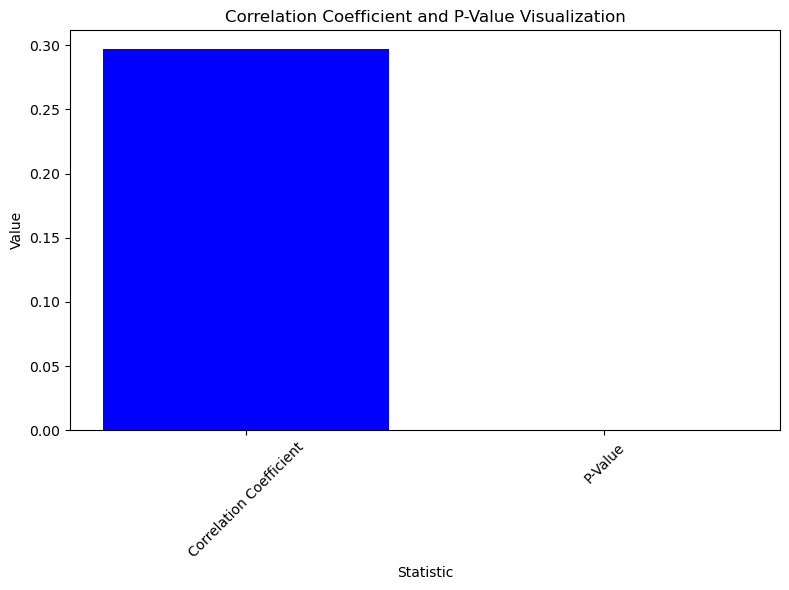

In [72]:
# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.2966682297161357  # Replace this with your actual correlation coefficient
p_value = 1.2160731794304662e-155  # Replace this with your actual p-value
# Create a bar plot for the correlation coefficient and p-value
plt.figure(figsize=(8, 6))
plt.bar(['Correlation Coefficient', 'P-Value'], [corr_coefficient, p_value], color=['blue', 'green'])
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Correlation Coefficient and P-Value Visualization')
plt.xticks(rotation=45)
plt.tight_layout()

In [70]:
# Show the plot
plt.show()

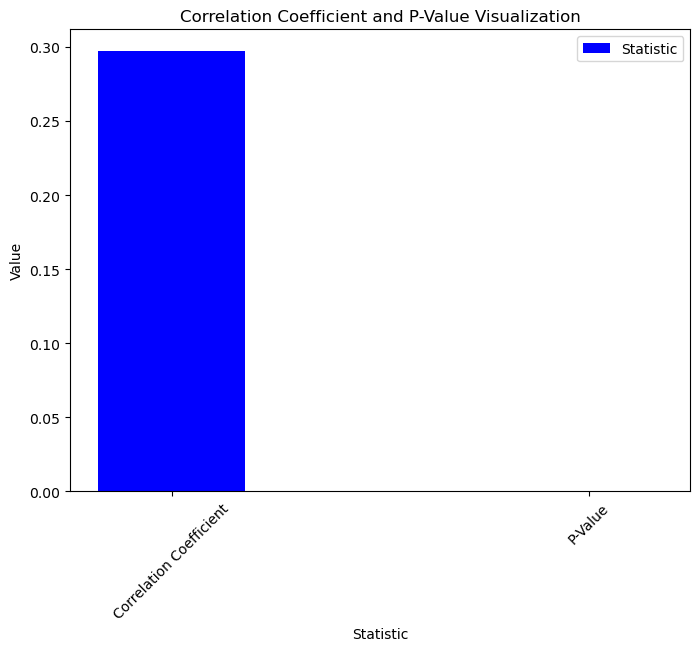

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  # Replace this with your actual correlation coefficient
p_value = 1.216e-155  # Replace this with your actual p-value

# Create a grouped bar plot for the correlation coefficient and p-value
labels = ['Correlation Coefficient', 'P-Value']
values = [corr_coefficient, p_value]
colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x, values, width, label='Statistic', color=colors)
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Correlation Coefficient and P-Value Visualization')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Show the plot
plt.show()


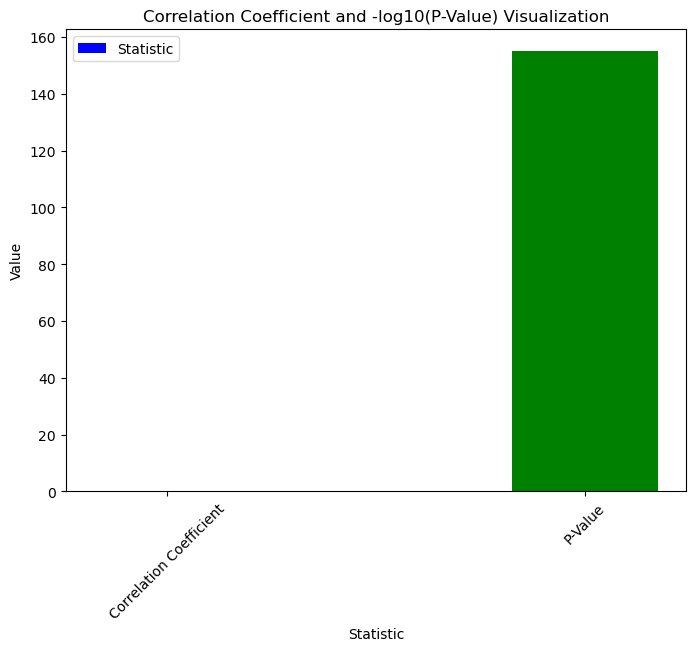

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  # Replace this with your actual correlation coefficient
p_value = 1.216e-155  # Replace this with your actual p-value

# Create a grouped bar plot for the correlation coefficient and p-value
labels = ['Correlation Coefficient', 'P-Value']
values = [corr_coefficient, -np.log10(p_value)]  # Use -log10(p-value) for better visualization
colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x, values, width, label='Statistic', color=colors)
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Correlation Coefficient and -log10(P-Value) Visualization')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Show the plot
plt.show()


Here's the code to create a grouped bar plot that displays both the correlation coefficient and the p-value:

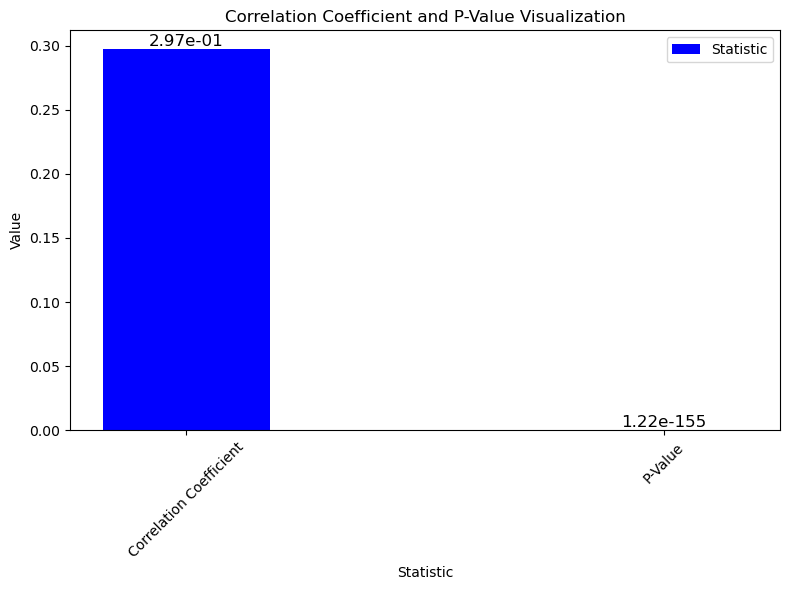

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  # Replace this with your actual correlation coefficient
p_value = 1.216e-155  # Replace this with your actual p-value

# Create a grouped bar plot for the correlation coefficient and p-value
labels = ['Correlation Coefficient', 'P-Value']
values = [corr_coefficient, p_value]
colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x, values, width, label='Statistic', color=colors)
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Correlation Coefficient and P-Value Visualization')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Display the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2e}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


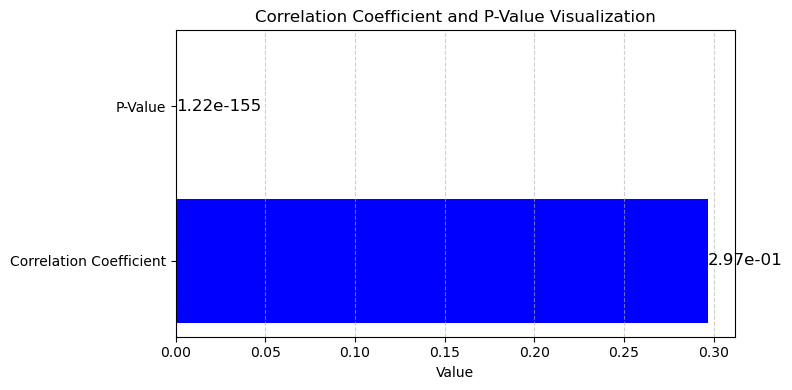

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  # Replace this with your actual correlation coefficient
p_value = 1.216e-155  # Replace this with your actual p-value

# Create a horizontal bar plot for the correlation coefficient and p-value
labels = ['Correlation Coefficient', 'P-Value']
values = [corr_coefficient, p_value]
colors = ['blue', 'green']

plt.figure(figsize=(8, 4))
y = np.arange(len(labels))

plt.barh(y, values, color=colors)
plt.xlabel('Value')
plt.title('Correlation Coefficient and P-Value Visualization')

# Display the values next to the bars
for i, v in enumerate(values):
    plt.text(v, i, f'{v:.2e}', va='center', fontsize=12)

plt.yticks(y, labels)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


VISUALIZATION OF THE # Calculate the Pearson correlation coefficient and p-value
#corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# diese berechnung als plot , scata plot


To visualize the Pearson correlation coefficient and p-value using a scatter plot in Python, you can create a scatter plot with the correlation coefficient on one axis and the negative logarithm (base 10) of the p-value on the other axis. This is a common approach to visualize correlation strength and statistical significance. Here's how you can do it.
In this code, we calculate the negative logarithm (base 10) of the p-value to visualize its significance more effectively. The scatter plot shows the relationship between the correlation coefficient and the significance of the correlation.

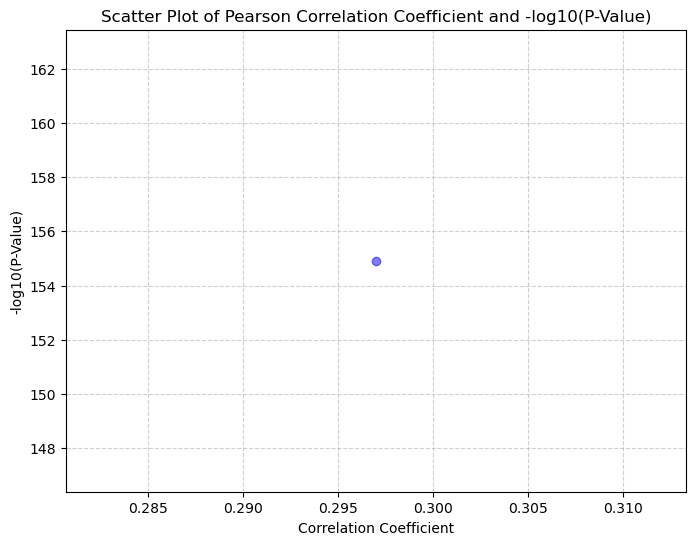

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.2966682297161357  # Replace this with your actual correlation coefficient
p_value = 1.2160731794304662e-155  # Replace this with your actual p-value

# Calculate -log10(p-value) for better visualization
neg_log_p_value = -np.log10(p_value)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(corr_coefficient, neg_log_p_value, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P-Value)')
plt.title('Scatter Plot of Pearson Correlation Coefficient and -log10(P-Value)')

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


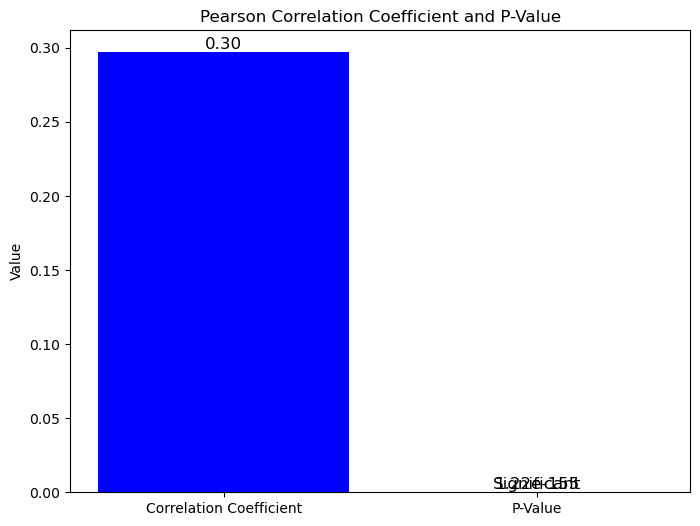

In [83]:
# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    significance = "Significant"
else:
    significance = "Not Significant"

    
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Correlation Coefficient', 'P-Value'], [corr_coefficient, p_value], color=['blue', 'green'])
plt.title('Pearson Correlation Coefficient and P-Value')
plt.ylabel('Value')
plt.text(0, corr_coefficient, f'{corr_coefficient:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, p_value, f'{p_value:.2e}', ha='center', va='bottom', fontsize=12)
plt.text(1, p_value * 0.5, significance, ha='center', va='bottom', fontsize=12)
plt.show()

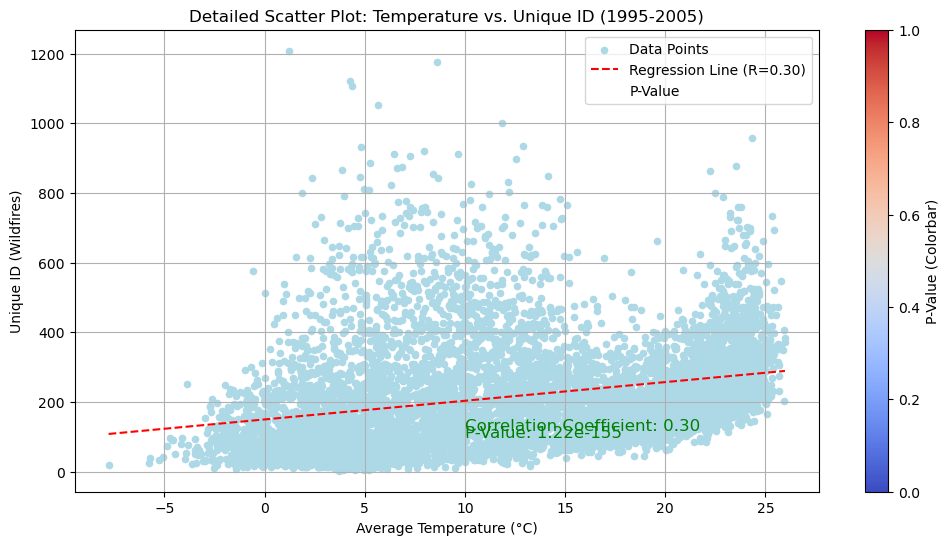

In [89]:
# Create a detailed scatter plot with a regression line
plt.figure(figsize=(12, 6))

# Scatter plot with temperature and unique ID
plt.scatter(merged_data['average_temp_c'], merged_data['Number of Wildfires'], s=20, c='lightblue', label='Data Points')

# Add labels and titles
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Unique ID (Wildfires)')
plt.title('Detailed Scatter Plot: Temperature vs. Unique ID (1995-2005)')

# Add annotations for correlation coefficient and p-value
plt.text(10, 120, f'Correlation Coefficient: {corr_coefficient:.2f}', fontsize=12, color='green')
plt.text(10, 100, f'P-Value: {p_value:.2e}', fontsize=12, color='green')

# Add a regression line
slope, intercept, r_value, _, _ = stats.linregress(merged_data['average_temp_c'], merged_data['Number of Wildfires'])
line_x = np.array([min(merged_data['average_temp_c']), max(merged_data['average_temp_c'])])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='red', linestyle='--', label=f'Regression Line (R={r_value:.2f})')

# Customize the colorbar legend to represent p-value
sc = plt.scatter([], [], c=[], cmap='coolwarm', label='P-Value')
plt.colorbar(sc, label='P-Value (Colorbar)')

plt.legend()
plt.grid(True)

plt.show()

NEW

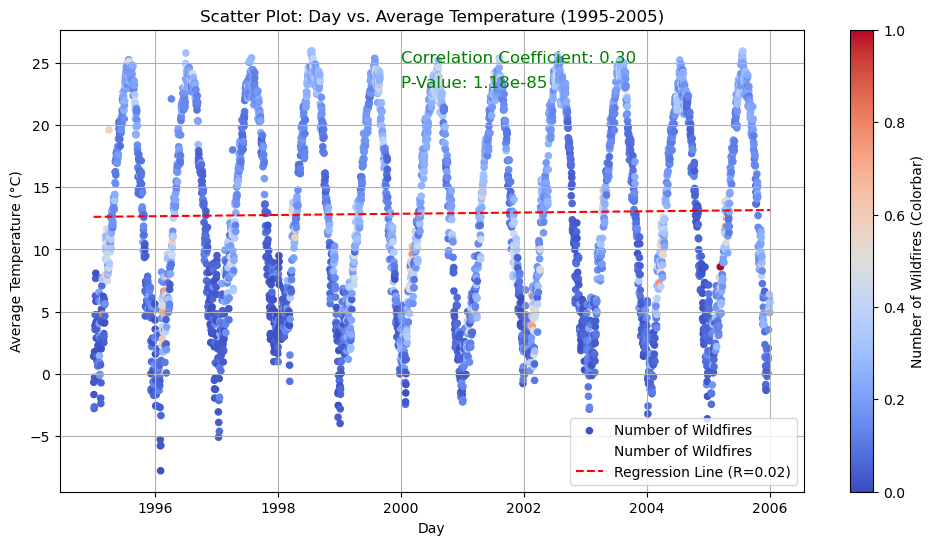

In [97]:
# Convert string dates to datetime.date objects for comparison
start_date = pd.to_datetime('1995-01-01').date()
end_date = pd.to_datetime('2005-12-31').date()

# Filter the dataset for the years 1995-2005
merged_data = merged_data[(merged_data['Day'] >= start_date) & (merged_data['Day'] <= end_date)]

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# Create a scatter plot with 'Day' on the x-axis, 'average_temp_c' on the y-axis (in Celsius),
# 'Number of Wildfires' as data points, and include correlation coefficient and p-value
plt.figure(figsize=(12, 6))

# Scatter plot with 'Day' and 'average_temp_c'
plt.scatter(merged_data['Day'], merged_data['average_temp_c'], s=20, c=merged_data['Number of Wildfires'], cmap='coolwarm', label='Number of Wildfires')

# Add labels and titles
plt.xlabel('Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Scatter Plot: Day vs. Average Temperature (1995-2005)')

# Add colorbar legend to represent 'Number of Wildfires'
sc = plt.scatter([], [], c=[], cmap='coolwarm', label='Number of Wildfires')
plt.colorbar(sc, label='Number of Wildfires (Colorbar)')

# Add annotations for correlation coefficient and p-value
plt.text(pd.to_datetime('2000-01-01'), 25, f'Correlation Coefficient: {corr_coefficient:.2f}', fontsize=12, color='green')
plt.text(pd.to_datetime('2000-01-01'), 23, f'P-Value: {p_value:.2e}', fontsize=12, color='green')

# Calculate and add a regression line
days_since_start = (merged_data['Day'] - start_date).dt.days
slope, intercept, r_value, _, _ = stats.linregress(days_since_start, merged_data['average_temp_c'])
line_x = np.array(days_since_start)
line_y = slope * line_x + intercept
plt.plot(merged_data['Day'], line_y, color='red', linestyle='--', label=f'Regression Line (R={r_value:.2f})')

plt.legend()
plt.grid(True)

plt.show()

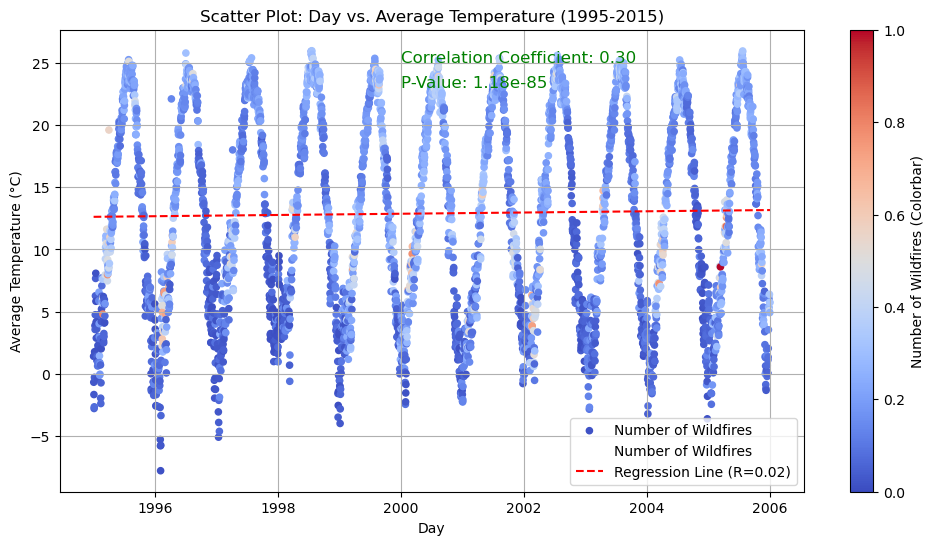

In [98]:

# Convert string dates to datetime.date objects for comparison
start_date = pd.to_datetime('1995-01-01').date()
end_date = pd.to_datetime('2015-12-31').date()

# Filter the dataset for the years 1995-2015
merged_data = merged_data[(merged_data['Day'] >= start_date) & (merged_data['Day'] <= end_date)]

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# Create a scatter plot with 'Day' on the x-axis, 'average_temp_c' on the y-axis (in Celsius),
# 'Number of Wildfires' as data points, and include correlation coefficient and p-value
plt.figure(figsize=(12, 6))

# Scatter plot with 'Day' and 'average_temp_c'
plt.scatter(merged_data['Day'], merged_data['average_temp_c'], s=20, c=merged_data['Number of Wildfires'], cmap='coolwarm', label='Number of Wildfires')

# Add labels and titles
plt.xlabel('Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Scatter Plot: Day vs. Average Temperature (1995-2015)')

# Add colorbar legend to represent 'Number of Wildfires'
sc = plt.scatter([], [], c=[], cmap='coolwarm', label='Number of Wildfires')
plt.colorbar(sc, label='Number of Wildfires (Colorbar)')

# Add annotations for correlation coefficient and p-value
plt.text(pd.to_datetime('2000-01-01'), 25, f'Correlation Coefficient: {corr_coefficient:.2f}', fontsize=12, color='green')
plt.text(pd.to_datetime('2000-01-01'), 23, f'P-Value: {p_value:.2e}', fontsize=12, color='green')

# Calculate and add a regression line
days_since_start = (merged_data['Day'] - start_date).dt.days
slope, intercept, r_value, _, _ = stats.linregress(days_since_start, merged_data['average_temp_c'])
line_x = np.array(days_since_start)
line_y = slope * line_x + intercept
plt.plot(merged_data['Day'], line_y, color='red', linestyle='--', label=f'Regression Line (R={r_value:.2f})')

plt.legend()
plt.grid(True)

plt.show()

In [99]:
# Extract year from the 'Day' column
merged_data['Year'] = merged_data['Day'].dt.year

# Calculate the Pearson correlation coefficient and p-value for each year
corr_coefficients = []
p_values = []

for year in range(1995, 2016):
    year_data = merged_data[merged_data['Year'] == year]
    corr_coefficient, p_value = stats.pearsonr(year_data['average_temp_c'], year_data['Number of Wildfires'])
    corr_coefficients.append(corr_coefficient)
    p_values.append(p_value)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting the correlation coefficients
plt.subplot(2, 1, 1)
plt.plot(range(1995, 2016), corr_coefficients, marker='o')
plt.title('Yearly Pearson Correlation Coefficients (1995-2015)')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')

# Plotting the p-values
plt.subplot(2, 1, 2)
plt.plot(range(1995, 2016), p_values, marker='o', color='green')
plt.title('Yearly P-Values (1995-2015)')
plt.xlabel('Year')
plt.ylabel('P-Value')

plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

STAKEHOLDER BESPRECHUNG DO, 28.09.2023

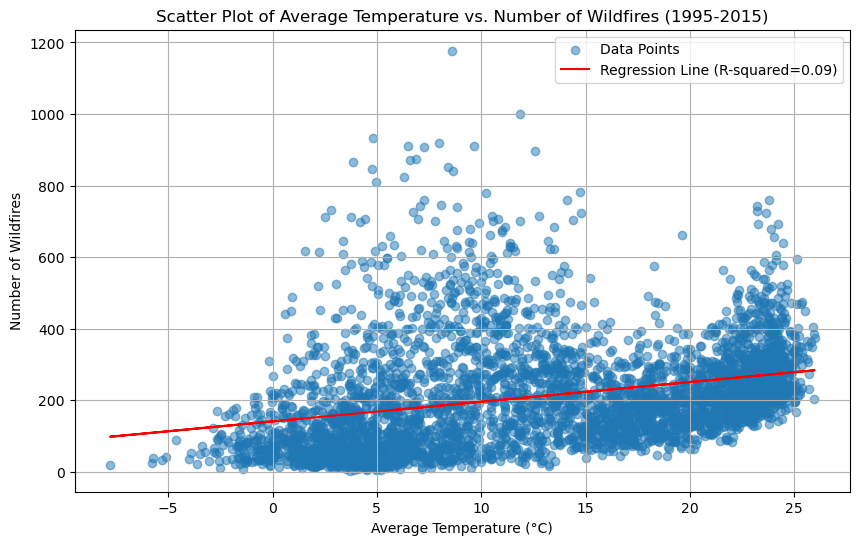

In [100]:
# Streudiagramm mit einer Regressionslinie erstellen
plt.figure(figsize=(10, 6))
x = merged_data['average_temp_c']
y = merged_data['Number of Wildfires']

# Berechnung der Regressionslinie
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Pearson Correlation Coefficient: 0.2966682297161357
P-Value: 1.2160731794304662e-155
MESSAGE in trendline:  higher temperature increase the number of wildfires.
alternative plot: temperature in bar plots, bucket one -5 till 5 cold weather -> how many wildfires in these cold weather ....in 3 groups for example

seasonal 

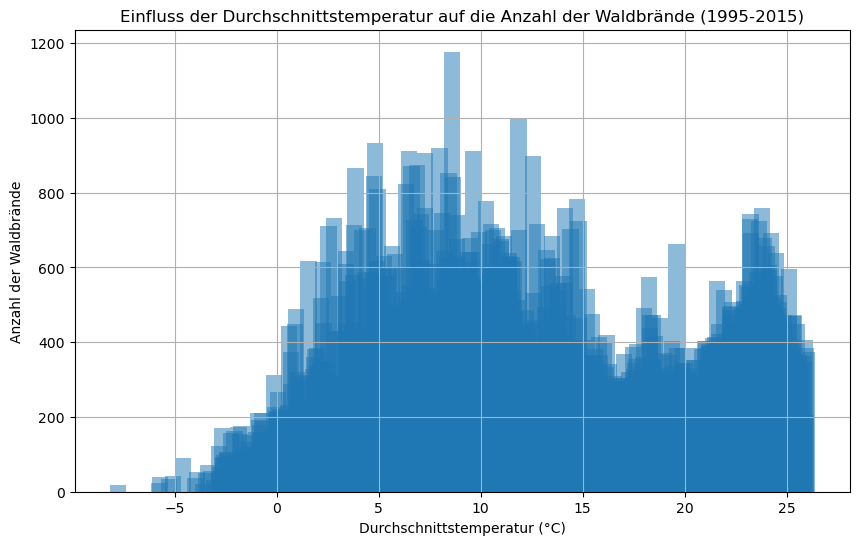

Pearson-Korrelationskoeffizient: 0.30
P-Wert: 1.18e-85


In [101]:
# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['average_temp_c'], merged_data['Number of Wildfires'], alpha=0.5)
plt.title('Einfluss der Durchschnittstemperatur auf die Anzahl der Waldbrände (1995-2015)')
plt.xlabel('Durchschnittstemperatur (°C)')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)
plt.show()

# Ergebnisse ausgeben
print(f"Pearson-Korrelationskoeffizient: {corr_coefficient:.2f}")
print(f"P-Wert: {p_value:.2e}")

Pearson-Korrelationskoeffizient: 0.30
P-Wert: 1.18e-85


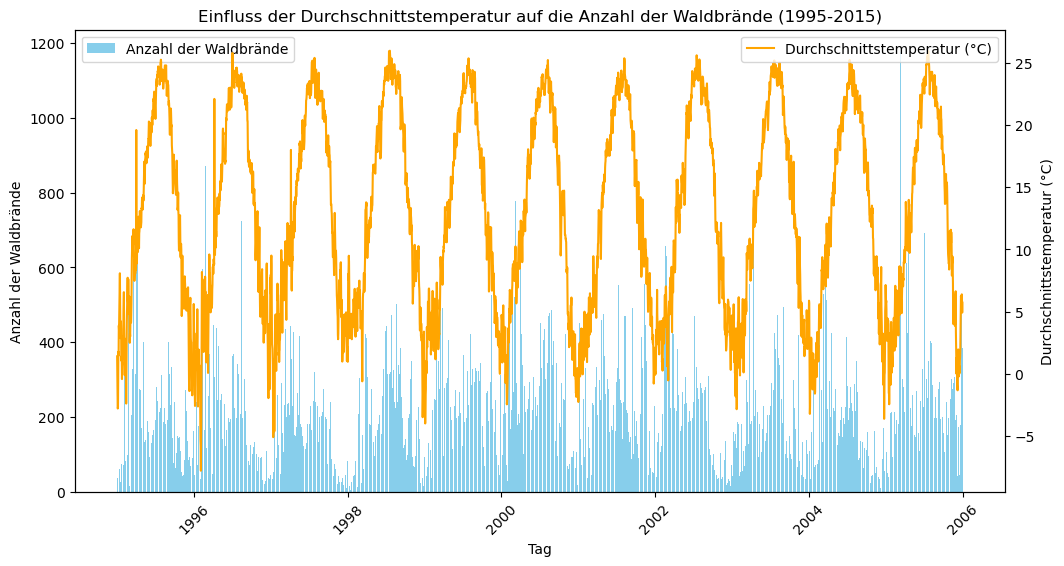

In [102]:
# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(merged_data['Day'], merged_data['Number of Wildfires'], color='skyblue', label='Anzahl der Waldbrände')
plt.xlabel('Tag')
plt.ylabel('Anzahl der Waldbrände')
plt.title('Einfluss der Durchschnittstemperatur auf die Anzahl der Waldbrände (1995-2015)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Linie für Durchschnittstemperatur hinzufügen
plt.twinx()
plt.plot(merged_data['Day'], merged_data['average_temp_c'], color='orange', label='Durchschnittstemperatur (°C)')
plt.ylabel('Durchschnittstemperatur (°C)')
plt.legend(loc='upper right')

# Ergebnisse ausgeben
print(f"Pearson-Korrelationskoeffizient: {corr_coefficient:.2f}")
print(f"P-Wert: {p_value:.2e}")

Pearson-Korrelationskoeffizient: 0.30
P-Wert: 1.22e-155


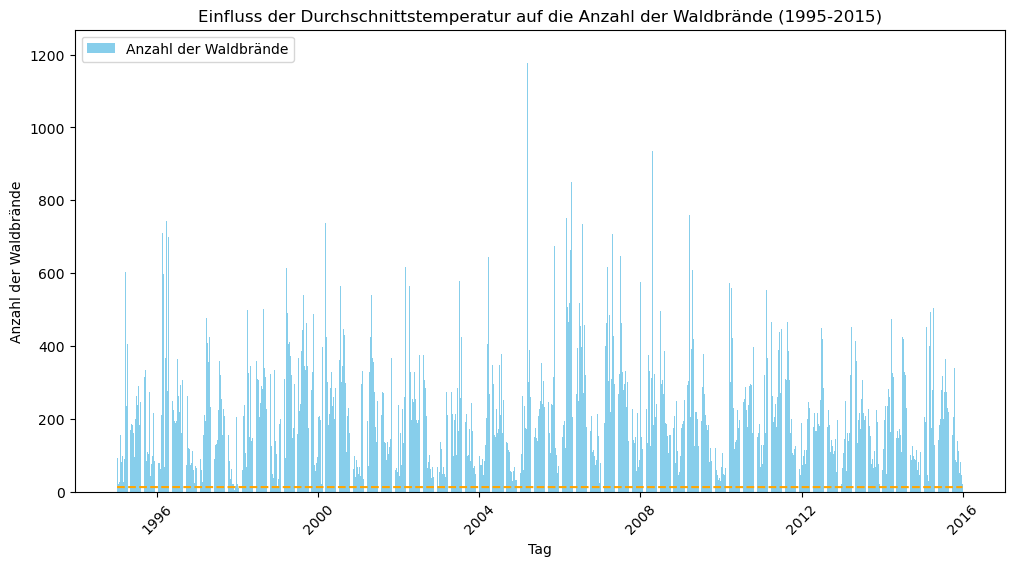

In [109]:




# Die Anzahl der eindeutigen Waldbrände an jedem Tag zählen
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']

# Tägliche Durchschnittstemperatur und Anzahl der Waldbrände zusammenführen
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

# Berechnung des Pearson-Korrelationskoeffizienten und des p-Werts
corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(merged_data['Day'], merged_data['Number of Wildfires'], color='skyblue', label='Anzahl der Waldbrände')
plt.xlabel('Tag')
plt.ylabel('Anzahl der Waldbrände')
plt.title('Einfluss der Durchschnittstemperatur auf die Anzahl der Waldbrände (1995-2015)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Regressionslinie hinzufügen
slope, intercept, r_value, _, _ = stats.linregress(range(len(merged_data)), merged_data['average_temp_c'])
line_x = range(len(merged_data))
line_y = slope * line_x + intercept
plt.plot(merged_data['Day'], line_y, color='orange', linestyle='--', label='Regressionslinie')

# Ergebnisse ausgeben
print(f"Pearson-Korrelationskoeffizient: {corr_coefficient:.2f}")
print(f"P-Wert: {p_value:.2e}")

plt.show()


Pearson-Korrelationskoeffizient: 0.30
P-Wert: 1.22e-155


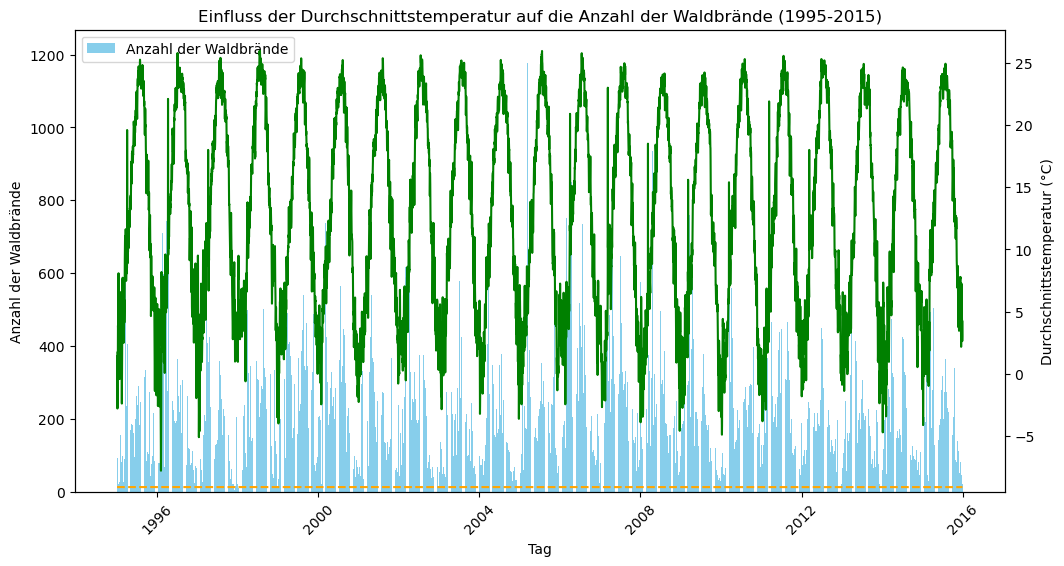

In [110]:
# Die Anzahl der eindeutigen Waldbrände an jedem Tag zählen
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']

# Tägliche Durchschnittstemperatur und Anzahl der Waldbrände zusammenführen
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

# Berechnung des Pearson-Korrelationskoeffizienten und des p-Werts
corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(merged_data['Day'], merged_data['Number of Wildfires'], color='skyblue', label='Anzahl der Waldbrände')
plt.xlabel('Tag')
plt.ylabel('Anzahl der Waldbrände')
plt.title('Einfluss der Durchschnittstemperatur auf die Anzahl der Waldbrände (1995-2015)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Regressionslinie hinzufügen
slope, intercept, r_value, _, _ = stats.linregress(range(len(merged_data)), merged_data['average_temp_c'])
line_x = range(len(merged_data))
line_y = slope * line_x + intercept
plt.plot(merged_data['Day'], line_y, color='orange', linestyle='--', label='Regressionslinie')

# Durchschnittstemperatur hinzufügen
plt.twinx()
plt.plot(merged_data['Day'], merged_data['average_temp_c'], color='green', label='Durchschnittstemperatur (°C)')
plt.ylabel('Durchschnittstemperatur (°C)')

# Ergebnisse ausgeben
print(f"Pearson-Korrelationskoeffizient: {corr_coefficient:.2f}")
print(f"P-Wert: {p_value:.2e}")

plt.show()

In [113]:
merged_data

,date,average_temp_c,Day,Number of Wildfires
0,1995-01-01,1.410345,1995-01-01,18
1,1995-01-02,-0.674545,1995-01-02,33
2,1995-01-03,-1.664407,1995-01-03,38
3,1995-01-04,-2.786207,1995-01-04,67
4,1995-01-05,-2.650000,1995-01-05,92
...,...,...,...,...
7665,2015-12-27,4.262319,2015-12-27,11
7666,2015-12-28,3.232353,2015-12-28,20
7667,2015-12-29,2.632857,2015-12-29,26
7668,2015-12-30,3.034286,2015-12-30,17


In [117]:
merged_data[['average_temp_c', 'Number of Wildfires']].corr()

,average_temp_c,Number of Wildfires
average_temp_c,1.000000,0.296668
Number of Wildfires,0.296668,1.000000


LINIE TEMP UND LINE FÜR ANZAHL DER WALDBRÄNDE

In [121]:
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


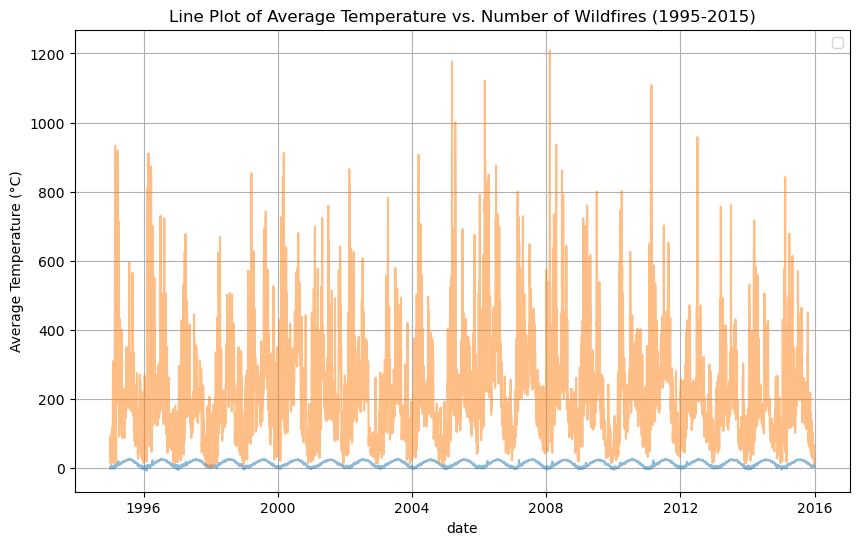

In [125]:

# Streudiagramm mit einer Regressionslinie erstellen
plt.figure(figsize=(10, 6))



sns.lineplot(data = merged_data, x = 'date', y = 'average_temp_c', alpha=0.5)
sns.lineplot(data = merged_data, x = 'date', y = 'Number of Wildfires', alpha=0.5)

#plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Line Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()